In [7]:
#Importing Libraries
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split as tts
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [8]:
# Visualizing 6 decimals per value
pd.set_option('display.float_format', lambda x: '%.6f' % x)

# Reading data from csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

sensorama = load_dataset('sensorama_df.csv')

In [9]:
# Since odor name and canonical_smiles variables are strings, we change them to a numerical value
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(sensorama['odor name'])
sensorama['odor name']=label_encoder.transform(sensorama['odor name'])
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(sensorama['canonical_smiles'])
sensorama['canonical_smiles']= label_encoder.transform(sensorama['canonical_smiles'])

In [10]:
# Normalizing function
def standarize(x_train):
    mean = x_train.mean()
    std = x_train.std()
    x_train -= mean
    x_train /= std

# Normalizing data
s= sensorama.columns
s=s.drop(['odor level', 'cid', 'canonical_smiles', 'odor name'])
for c in s:
    standarize(sensorama[c])
# After normalizing the data, we have NaNs values, so we change them to 0
sensorama=sensorama.fillna(0)

### ODOR LEVEL 1

In [30]:
X = sensorama[['odor name', 'cid', 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'rings 8', 'rings 9', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12', 'mden.13', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 'khs.sli', 'khs.ssbe', 'khs.ssssbe', 'khs.ssbh', 'khs.sssb',
               'khs.ssssb', 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh3', 'khs.snh2', 'khs.ssnh', 'khs.dnh', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn', 'khs.sssnh', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.ssssn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 'khs.ssih3', 'khs.sssih2', 'khs.ssssih', 'khs.sssssi', 'khs.sph2',
               'khs.ssph', 'khs.sssp', 'khs.dsssp', 'khs.sssssp', 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl', 'khs.sGeH3', 'khs.ssGeH2', 'khs.sssGeH', 'khs.ssssGe', 'khs.sash2', 'khs.ssash', 'khs.sssas', 'khs.sssdas',
               'khs.sssssas', 'khs.sseh', 'khs.dse', 'khs.ssse', 'khs.aase', 'khs.dssse', 'khs.ddssse', 'khs.sbr', 'khs.ssnh3', 
               'khs.sssnh2', 'khs.ssssnh', 'khs.sssssn', 'khs.si', 'khs.spbh3', 'khs.sspbh2', 'khs.ssspbh', 'khs.sssspb', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','arom bond', 'arom atom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama['odor level']  == 1

Accuracy:  63.88086241386974 %


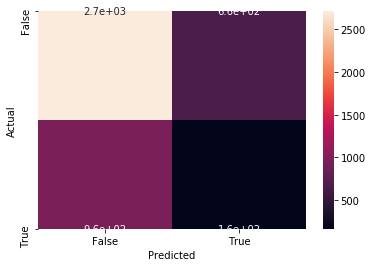

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

##### Feature Importances

0     0.445199
1     0.034092
208   0.010078
209   0.010066
151   0.009640
        ...   
120   0.000000
121   0.000000
55    0.000000
99    0.000000
56    0.000000
Length: 212, dtype: float64


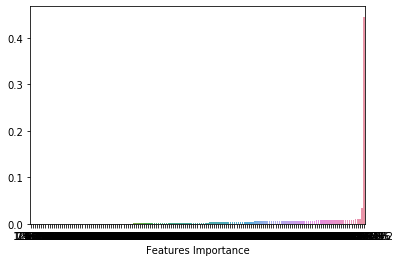

In [34]:
featureImportances = pd.Series(clf.feature_importances_).sort_values(ascending=False)
print(featureImportances)

sns.barplot(x=round(featureImportances,8), y=featureImportances)
plt.xlabel('Features Importance')
plt.show()

In [45]:
features = []
for i in range(0,len(featureImportances)):
    if featureImportances[i] == 0:
        features.append(i)

In [43]:
X = sensorama[['odor name', 'cid', 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 
               'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh2', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn','khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 
               'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama['odor level']  == 1

Accuracy:  64.03645254501001 %


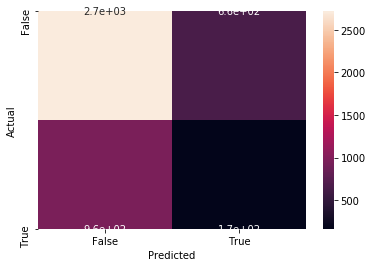

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

### ODOR LEVEL 2

In [51]:
X = sensorama[['odor name', 'cid', 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'rings 8', 'rings 9', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12', 'mden.13', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 'khs.sli', 'khs.ssbe', 'khs.ssssbe', 'khs.ssbh', 'khs.sssb',
               'khs.ssssb', 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh3', 'khs.snh2', 'khs.ssnh', 'khs.dnh', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn', 'khs.sssnh', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.ssssn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 'khs.ssih3', 'khs.sssih2', 'khs.ssssih', 'khs.sssssi', 'khs.sph2',
               'khs.ssph', 'khs.sssp', 'khs.dsssp', 'khs.sssssp', 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl', 'khs.sGeH3', 'khs.ssGeH2', 'khs.sssGeH', 'khs.ssssGe', 'khs.sash2', 'khs.ssash', 'khs.sssas', 'khs.sssdas',
               'khs.sssssas', 'khs.sseh', 'khs.dse', 'khs.ssse', 'khs.aase', 'khs.dssse', 'khs.ddssse', 'khs.sbr', 'khs.ssnh3', 
               'khs.sssnh2', 'khs.ssssnh', 'khs.sssssn', 'khs.si', 'khs.spbh3', 'khs.sspbh2', 'khs.ssspbh', 'khs.sssspb', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','arom bond', 'arom atom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama['odor level']  == 2

Accuracy:  66.77039342076017 %


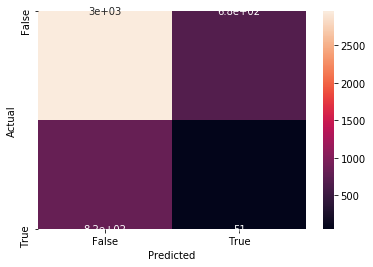

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

##### Feature Importances

0     0.533274
1     0.033003
150   0.008385
151   0.008323
152   0.008044
        ...   
120   0.000000
121   0.000000
123   0.000000
57    0.000000
125   0.000000
Length: 212, dtype: float64


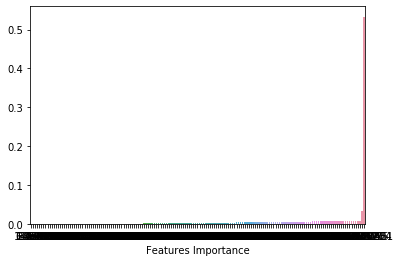

In [53]:
featureImportances = pd.Series(clf.feature_importances_).sort_values(ascending=False)
print(featureImportances)

sns.barplot(x=round(featureImportances,8), y=featureImportances)
plt.xlabel('Features Importance')
plt.show()

In [54]:
features = []
for i in range(0,len(featureImportances)):
    if featureImportances[i] == 0:
        features.append(i)

In [57]:
X = sensorama[['odor name', 'cid', 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7','tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 
               'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh2', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf',
               'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama['odor level']  == 2

Accuracy:  67.21493665258946 %


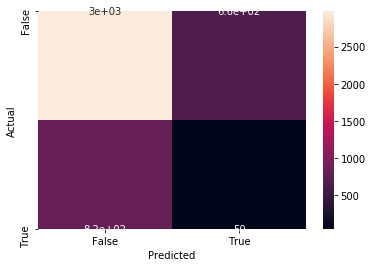

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

### ODOR LEVEL 3

In [59]:
X = sensorama[['odor name', 'cid', 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'rings 8', 'rings 9', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12', 'mden.13', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 'khs.sli', 'khs.ssbe', 'khs.ssssbe', 'khs.ssbh', 'khs.sssb',
               'khs.ssssb', 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh3', 'khs.snh2', 'khs.ssnh', 'khs.dnh', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn', 'khs.sssnh', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.ssssn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 'khs.ssih3', 'khs.sssih2', 'khs.ssssih', 'khs.sssssi', 'khs.sph2',
               'khs.ssph', 'khs.sssp', 'khs.dsssp', 'khs.sssssp', 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl', 'khs.sGeH3', 'khs.ssGeH2', 'khs.sssGeH', 'khs.ssssGe', 'khs.sash2', 'khs.ssash', 'khs.sssas', 'khs.sssdas',
               'khs.sssssas', 'khs.sseh', 'khs.dse', 'khs.ssse', 'khs.aase', 'khs.dssse', 'khs.ddssse', 'khs.sbr', 'khs.ssnh3', 
               'khs.sssnh2', 'khs.ssssnh', 'khs.sssssn', 'khs.si', 'khs.spbh3', 'khs.sspbh2', 'khs.ssspbh', 'khs.sssspb', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','arom bond', 'arom atom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama['odor level']  == 3

Accuracy:  70.79350966881529 %


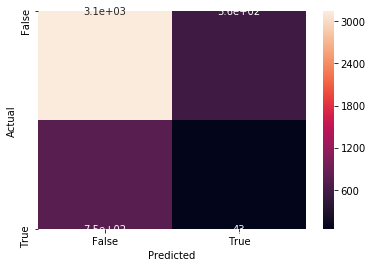

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

##### Feature Importances

0     0.549782
1     0.033597
151   0.008359
152   0.008092
209   0.007854
        ...   
109   0.000000
110   0.000000
111   0.000000
112   0.000000
105   0.000000
Length: 212, dtype: float64


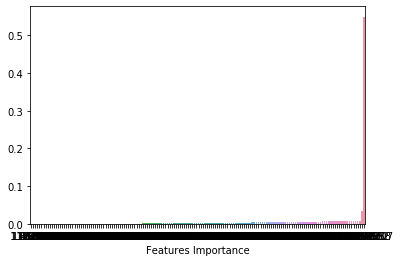

In [63]:
featureImportances = pd.Series(clf.feature_importances_).sort_values(ascending=False)
print(featureImportances)

sns.barplot(x=round(featureImportances,8), y=featureImportances)
plt.xlabel('Features Importance')
plt.show()

In [68]:
features = []
for i in range(0,len(featureImportances)):
    if featureImportances[i] == 0:
        features.append(i)

In [66]:
X = sensorama[['odor name', 'cid', 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12','mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 
               'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh2', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn','khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.soh',
               'khs.do', 'khs.sso',
               'khs.sssssp', 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.ddsss',
               'khs.sssspb', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5','arom atom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama['odor level']  == 3

Accuracy:  71.50477883974217 %


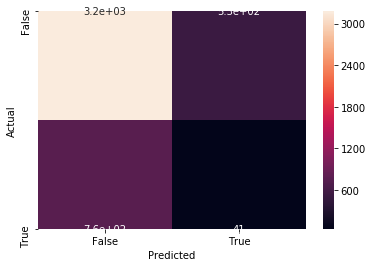

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

### ODOR LEVEL 4

In [69]:
X = sensorama[['odor name', 'cid', 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'rings 8', 'rings 9', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12', 'mden.13', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 'khs.sli', 'khs.ssbe', 'khs.ssssbe', 'khs.ssbh', 'khs.sssb',
               'khs.ssssb', 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh3', 'khs.snh2', 'khs.ssnh', 'khs.dnh', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn', 'khs.sssnh', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.ssssn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 'khs.ssih3', 'khs.sssih2', 'khs.ssssih', 'khs.sssssi', 'khs.sph2',
               'khs.ssph', 'khs.sssp', 'khs.dsssp', 'khs.sssssp', 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl', 'khs.sGeH3', 'khs.ssGeH2', 'khs.sssGeH', 'khs.ssssGe', 'khs.sash2', 'khs.ssash', 'khs.sssas', 'khs.sssdas',
               'khs.sssssas', 'khs.sseh', 'khs.dse', 'khs.ssse', 'khs.aase', 'khs.dssse', 'khs.ddssse', 'khs.sbr', 'khs.ssnh3', 
               'khs.sssnh2', 'khs.ssssnh', 'khs.sssssn', 'khs.si', 'khs.spbh3', 'khs.sspbh2', 'khs.ssspbh', 'khs.sssspb', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','arom bond', 'arom atom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama['odor level']  == 4

Accuracy:  77.55056679262057 %


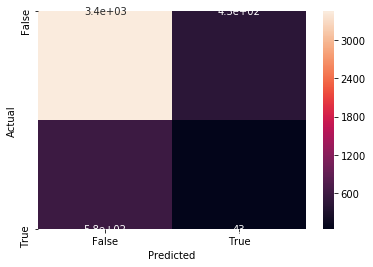

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

##### Feature Importances

0     0.552764
1     0.031281
150   0.008169
208   0.008033
194   0.007965
        ...   
110   0.000000
111   0.000000
112   0.000000
113   0.000000
105   0.000000
Length: 212, dtype: float64


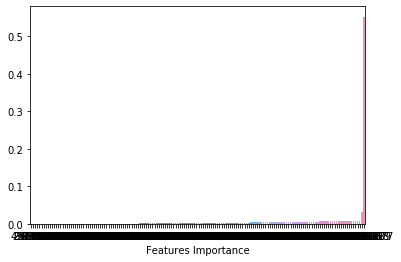

In [71]:
featureImportances = pd.Series(clf.feature_importances_).sort_values(ascending=False)
print(featureImportances)

sns.barplot(x=round(featureImportances,8), y=featureImportances)
plt.xlabel('Features Importance')
plt.show()

In [75]:
features = []
for i in range(0,len(featureImportances)):
    if featureImportances[i] == 0:
        features.append(i)

In [76]:
X = sensorama[['odor name', 'cid', 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11','mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 
               'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh2', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 
                'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss','kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama['odor level']  == 4

Accuracy:  77.99511002444987 %


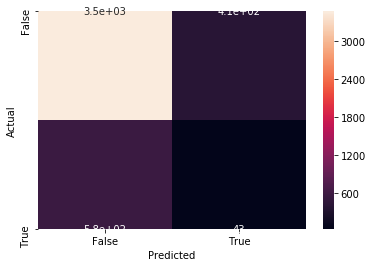

In [77]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

### ODOR LEVEL 5

In [78]:
X = sensorama[['odor name', 'cid', 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'rings 8', 'rings 9', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12', 'mden.13', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 'khs.sli', 'khs.ssbe', 'khs.ssssbe', 'khs.ssbh', 'khs.sssb',
               'khs.ssssb', 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh3', 'khs.snh2', 'khs.ssnh', 'khs.dnh', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn', 'khs.sssnh', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.ssssn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 'khs.ssih3', 'khs.sssih2', 'khs.ssssih', 'khs.sssssi', 'khs.sph2',
               'khs.ssph', 'khs.sssp', 'khs.dsssp', 'khs.sssssp', 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl', 'khs.sGeH3', 'khs.ssGeH2', 'khs.sssGeH', 'khs.ssssGe', 'khs.sash2', 'khs.ssash', 'khs.sssas', 'khs.sssdas',
               'khs.sssssas', 'khs.sseh', 'khs.dse', 'khs.ssse', 'khs.aase', 'khs.dssse', 'khs.ddssse', 'khs.sbr', 'khs.ssnh3', 
               'khs.sssnh2', 'khs.ssssnh', 'khs.sssssn', 'khs.si', 'khs.spbh3', 'khs.sspbh2', 'khs.ssspbh', 'khs.sssspb', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','arom bond', 'arom atom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama['odor level']  == 5

Accuracy:  83.41853745276728 %


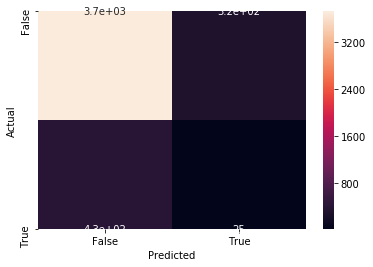

In [79]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

##### Feature Importances

0     0.576275
1     0.028818
209   0.007888
151   0.007856
152   0.007698
        ...   
111   0.000000
112   0.000000
113   0.000000
114   0.000000
105   0.000000
Length: 212, dtype: float64


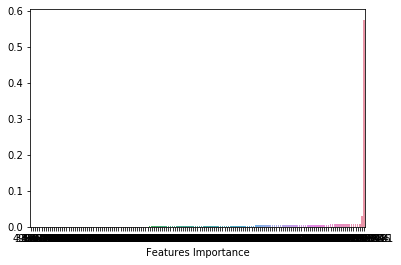

In [81]:
featureImportances = pd.Series(clf.feature_importances_).sort_values(ascending=False)
print(featureImportances)

sns.barplot(x=round(featureImportances,8), y=featureImportances)
plt.xlabel('Features Importance')
plt.show()

In [84]:
features = []
for i in range(0,len(featureImportances)):
    if featureImportances[i] == 0:
        features.append(i)

In [83]:
X = sensorama[['odor name', 'cid', 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 
               'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh2', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn','khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 
               'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss',
               'khs.scl', 'khs.sbr',  'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama['odor level']  == 5

Accuracy:  83.48521893754167 %


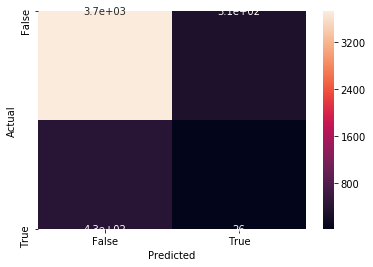

In [85]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

### ODOR LEVEL 6

In [94]:
X = sensorama[['odor name', 'cid', 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'rings 8', 'rings 9', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12', 'mden.13', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 'khs.sli', 'khs.ssbe', 'khs.ssssbe', 'khs.ssbh', 'khs.sssb',
               'khs.ssssb', 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh3', 'khs.snh2', 'khs.ssnh', 'khs.dnh', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn', 'khs.sssnh', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.ssssn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 'khs.ssih3', 'khs.sssih2', 'khs.ssssih', 'khs.sssssi', 'khs.sph2',
               'khs.ssph', 'khs.sssp', 'khs.dsssp', 'khs.sssssp', 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl', 'khs.sGeH3', 'khs.ssGeH2', 'khs.sssGeH', 'khs.ssssGe', 'khs.sash2', 'khs.ssash', 'khs.sssas', 'khs.sssdas',
               'khs.sssssas', 'khs.sseh', 'khs.dse', 'khs.ssse', 'khs.aase', 'khs.dssse', 'khs.ddssse', 'khs.sbr', 'khs.ssnh3', 
               'khs.sssnh2', 'khs.ssssnh', 'khs.sssssn', 'khs.si', 'khs.spbh3', 'khs.sspbh2', 'khs.ssspbh', 'khs.sssspb', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','arom bond', 'arom atom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama['odor level']  == 6

Accuracy:  87.84174260946878 %


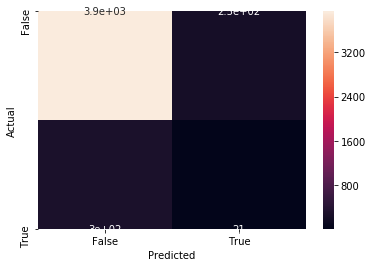

In [95]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

##### Feature Importances

0     0.621534
1     0.024530
151   0.007156
150   0.007066
153   0.007019
        ...   
112   0.000000
113   0.000000
114   0.000000
115   0.000000
45    0.000000
Length: 212, dtype: float64


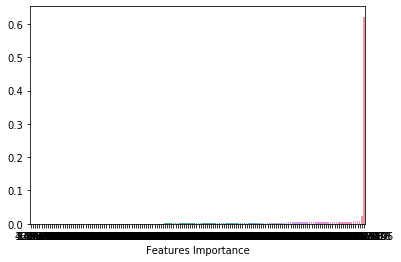

In [96]:
featureImportances = pd.Series(clf.feature_importances_).sort_values(ascending=False)
print(featureImportances)

sns.barplot(x=round(featureImportances,8), y=featureImportances)
plt.xlabel('Features Importance')
plt.show()

In [97]:
features = []
for i in range(0,len(featureImportances)):
    if featureImportances[i] == 0:
        features.append(i)

In [98]:
X = sensorama[['odor name', 'cid', 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 
               'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh2', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn','khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf',
               'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.sbr', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama['odor level']  == 6

Accuracy:  88.17515003334074 %


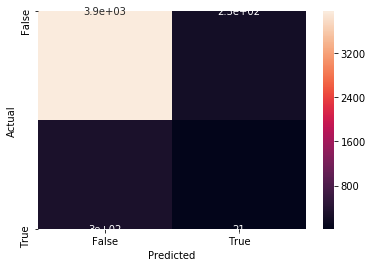

In [99]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

### ODOR LEVEL 7

In [110]:
X = sensorama[['odor name', 'cid', 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'rings 8', 'rings 9', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12', 'mden.13', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 'khs.sli', 'khs.ssbe', 'khs.ssssbe', 'khs.ssbh', 'khs.sssb',
               'khs.ssssb', 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh3', 'khs.snh2', 'khs.ssnh', 'khs.dnh', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn', 'khs.sssnh', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.ssssn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 'khs.ssih3', 'khs.sssih2', 'khs.ssssih', 'khs.sssssi', 'khs.sph2',
               'khs.ssph', 'khs.sssp', 'khs.dsssp', 'khs.sssssp', 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl', 'khs.sGeH3', 'khs.ssGeH2', 'khs.sssGeH', 'khs.ssssGe', 'khs.sash2', 'khs.ssash', 'khs.sssas', 'khs.sssdas',
               'khs.sssssas', 'khs.sseh', 'khs.dse', 'khs.ssse', 'khs.aase', 'khs.dssse', 'khs.ddssse', 'khs.sbr', 'khs.ssnh3', 
               'khs.sssnh2', 'khs.ssssnh', 'khs.sssssn', 'khs.si', 'khs.spbh3', 'khs.sspbh2', 'khs.ssspbh', 'khs.sssspb', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','arom bond', 'arom atom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama['odor level']  == 7

Accuracy:  92.1760391198044 %


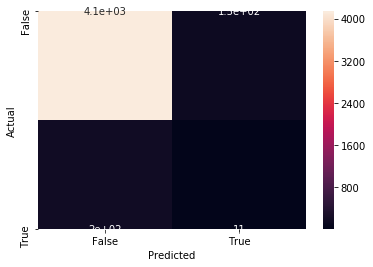

In [111]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

##### Feature Importances

0     0.646280
1     0.023004
208   0.007175
209   0.007085
197   0.006816
        ...   
109   0.000000
110   0.000000
111   0.000000
112   0.000000
105   0.000000
Length: 212, dtype: float64


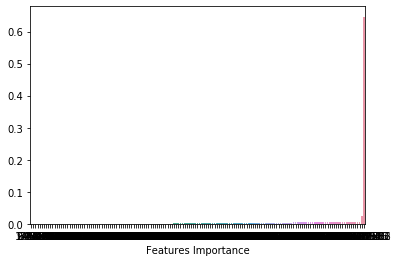

In [112]:
featureImportances = pd.Series(clf.feature_importances_).sort_values(ascending=False)
print(featureImportances)

sns.barplot(x=round(featureImportances,8), y=featureImportances)
plt.xlabel('Features Importance')
plt.show()

In [113]:
features = []
for i in range(0,len(featureImportances)):
    if featureImportances[i] == 0:
        features.append(i)

In [114]:
X = sensorama[['odor name', 'cid', 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14',
               'mdec.33', 'mdec.34', 'mdeo.11', 'mdeo.12', 'mdeo.22', 
               'mlogp', 'atom p', 'atom lc', 'khs.ssbe', 'khs.ssssbe', 'khs.ssbh', 'khs.sssb',
               'khs.ssssb', 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.aach',
               'khs.tsc', 'khs.dssc', 'khs.aasc','khs.ssssc', 'khs.snh3', 'khs.snh2', 'khs.ssnh', 'khs.dnh',
               'khs.aanh', 'khs.tn', 'khs.sssnh', 'khs.dsn','khs.ssih3', 'khs.sssih2', 'khs.ssssih', 'khs.sssssi', 
               'khs.ssnh3', 
               'khs.sssnh2', 'khs.ssssnh', 'khs.sssssn', 'khs.si', 'khs.spbh3', 'khs.sspbh2', 'khs.ssspbh', 'khs.sssspb', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama['odor level']  == 7

Accuracy:  92.33162925094466 %


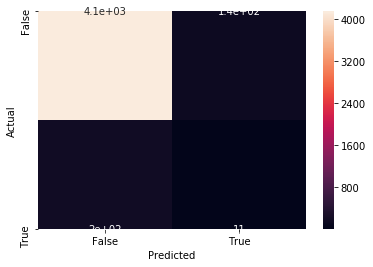

In [115]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

### ODOR LEVEL 8

In [116]:
X = sensorama[['odor name', 'cid', 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'rings 8', 'rings 9', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12', 'mden.13', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 'khs.sli', 'khs.ssbe', 'khs.ssssbe', 'khs.ssbh', 'khs.sssb',
               'khs.ssssb', 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh3', 'khs.snh2', 'khs.ssnh', 'khs.dnh', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn', 'khs.sssnh', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.ssssn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 'khs.ssih3', 'khs.sssih2', 'khs.ssssih', 'khs.sssssi', 'khs.sph2',
               'khs.ssph', 'khs.sssp', 'khs.dsssp', 'khs.sssssp', 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl', 'khs.sGeH3', 'khs.ssGeH2', 'khs.sssGeH', 'khs.ssssGe', 'khs.sash2', 'khs.ssash', 'khs.sssas', 'khs.sssdas',
               'khs.sssssas', 'khs.sseh', 'khs.dse', 'khs.ssse', 'khs.aase', 'khs.dssse', 'khs.ddssse', 'khs.sbr', 'khs.ssnh3', 
               'khs.sssnh2', 'khs.ssssnh', 'khs.sssssn', 'khs.si', 'khs.spbh3', 'khs.sspbh2', 'khs.ssspbh', 'khs.sssspb', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','arom bond', 'arom atom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama['odor level']  == 8

Accuracy:  95.97688375194487 %


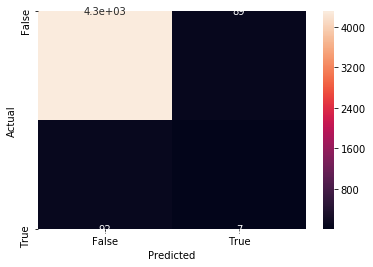

In [117]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

##### Feature Importances

0     0.657072
1     0.021948
198   0.007207
151   0.006850
2     0.006725
        ...   
112   0.000000
113   0.000000
114   0.000000
115   0.000000
105   0.000000
Length: 212, dtype: float64


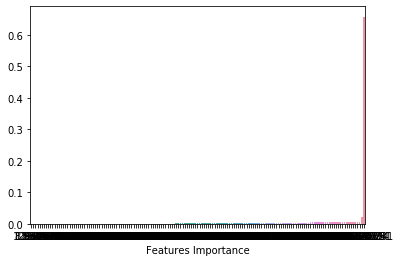

In [118]:
featureImportances = pd.Series(clf.feature_importances_).sort_values(ascending=False)
print(featureImportances)

sns.barplot(x=round(featureImportances,8), y=featureImportances)
plt.xlabel('Features Importance')
plt.show()

In [123]:
features = []
for i in range(0,len(featureImportances)):
    if featureImportances[i] == 0:
        features.append(i)

In [125]:
X = sensorama[['odor name', 'cid', 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22','mden.22',
               'mden.23', 'mlogp', 'atom p', 'atom lc', 
                'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh3', 'khs.ssnh',
               'khs.tn', 'khs.sssnh', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.ssssn',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 
               'khs.scl', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama['odor level']  == 8

Accuracy:  96.11024672149367 %


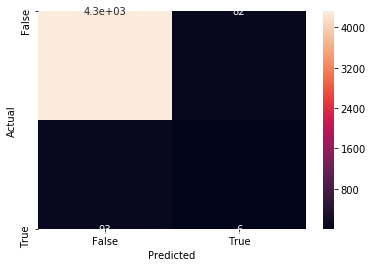

In [126]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()